# WEEK2 

## Random Forests on Gapminder dataset

### IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import sklearn.metrics as sk
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

### Importing Datesets

In [3]:
data = pd.read_csv("gapminder.csv")

data1 = data.iloc[:,[0,1,2,9,14]].copy()

data1.head()

data1.columns = ["country","income","alcohol","life","employment"]

### Data Management

In [4]:
data1  = data1.iloc[:,1:]

def fun1(a):
    
    for i in range(len(a)):
        if a[i]==" ":
            a[i] = np.nan
        else :
            a[i] = float(a[i])
            
            
    x = np.mean(a.dropna())
    
    for i in range(len(a)):
        if np.isnan(a[i]):
            a[i] = x
            

for i in data1.columns :
    fun1(data1[i])

data1.head()

## Removing Outliers 

data2 = data1.copy()

def fun2(a):
    mean = np.mean(a)
    std = np.std(a)
    
    mx = mean+3*std
    mn = mean-3*std
    
    for i in range(len(a)):
        
        if (a[i]>mx)|(a[i]<mn):
            a[i]=np.nan
            
    
    

for i in data2.columns:
    fun2(data2[i])

l1 =  len(data2)

data2 = data2.dropna()

l1 - len(data2) 

5

5 outliers removed

### Modeling 

In [5]:
def fun3(a):
    if a<70:
        return 0
    else:
        return 1


    
data2["life"] = list(map(fun3,data2["life"]))

data2["income"] = pd.to_numeric(data2["income"])
data2["alcohol"] = pd.to_numeric(data2["alcohol"])
data2["employment"] = pd.to_numeric(data2["employment"])

data2["life"] = data2["life"].astype("category")

data2["life"].value_counts()

tar = data2["life"]
exp = data2.iloc[:,[0,1,3]]

x_train,x_test,y_train,y_test = train_test_split(exp,tar)

In [6]:
model = RandomForestClassifier().fit(x_train,y_train)

In [7]:
pred = model.predict(x_test)

In [8]:
sk.confusion_matrix(y_test,pred)

array([[16, 12],
       [ 3, 21]], dtype=int64)

In [9]:
sk.accuracy_score(y_test,pred)

0.7115384615384616

71 % accuracy

# Plotting number of trees and accuracy

In [14]:
ls_x = []
ls_y = []
for i in range(10,100,10):
    model = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    pred = model.predict(x_test)
    ls_x.append(i)
    ls_y.append(sk.accuracy_score(y_test,pred))

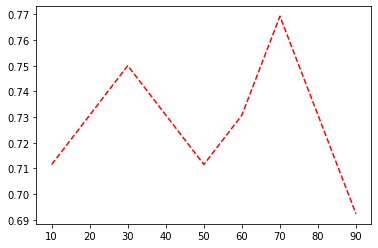

In [17]:
import matplotlib.pyplot as plt
plt.plot(ls_x,ls_y,"--r")

This actually shoes that when n = 70 has the best accuracy

### Final model

In [19]:
model = RandomForestClassifier(n_estimators=70).fit(x_train,y_train)
pred = model.predict(x_test)
sk.accuracy_score(y_test,pred)

0.75

75% is the max accuray we can get usinf random forests